In [6]:
import netCDF4 as nc
import pandas as pd

# Specify the file path
file_path = 'C:\\Users\\Administrator\\Downloads\\DotsonCTDsLADCP_2000_2016.nc'

# Load the NetCDF file
dataset = nc.Dataset(file_path, mode='r')

# Extract data from the dataset
pressure = dataset.variables['P'][:]
platform = [''.join([char.decode('utf-8') for char in row]) for row in dataset.variables['Platform'][:]]
pi = [''.join([char.decode('utf-8') for char in row]) for row in dataset.variables['PI'][:]]
longitude = dataset.variables['Lon'][:]
latitude = dataset.variables['Lat'][:]
station = dataset.variables['Station'][:]
time = dataset.variables['Time'][:]
temperature = dataset.variables['T'][:]
salinity = dataset.variables['S'][:]
dissolved_oxygen = dataset.variables['DO'][:]
u_velocity = dataset.variables['U'][:]
v_velocity = dataset.variables['V'][:]

# Create a list of data for each station
data = []

for i in range(len(station)):
    for j in range(len(pressure)):
        data.append({
            'Station': station[i],
            'Platform': platform[i],
            'PI': pi[i],
            'Longitude': longitude[i],
            'Latitude': latitude[i],
            'Time': time[i],
            'Pressure': pressure[j],
            'Temperature': temperature[j, i],
            'Salinity': salinity[j, i],
            'Dissolved Oxygen': dissolved_oxygen[j, i],
            'U Velocity': u_velocity[j, i],
            'V Velocity': v_velocity[j, i],
        })

# Convert to DataFrame
df = pd.DataFrame(data)

# Optionally save the DataFrame to a CSV file
csv_file_path = 'C:\\Users\\Administrator\\Downloads\\DotsonCTDsLADCP_2000_2016.csv'
df.to_csv(csv_file_path, index=False)

print("Data has been successfully extracted and saved to a CSV file.")


Data has been successfully extracted and saved to a CSV file.


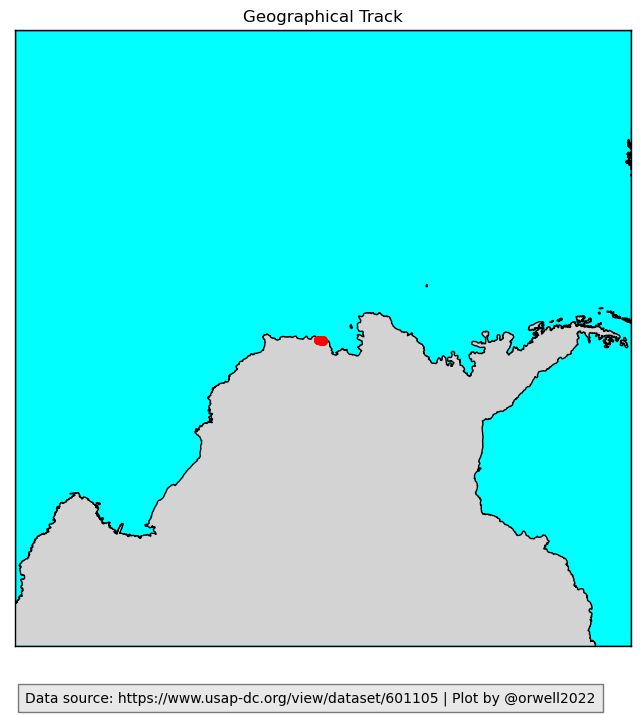

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Longitude and Latitude data
longitude = [
    -113.1765, -112.5273, -112.0432, -113.349245, -113.20577, -112.8612033, 
    -112.5255717, -112.1934667, -111.941255, -113.3535, -113.2077, -112.8695, 
    -112.529, -112.1925, -111.9422, -113.339, -113.2117, -112.8746, 
    -112.5311, -112.1939, -111.9415, -113.3411813, -113.2508384, 
    -112.5071206, -112.0018547, -113.329, -112.8208, -112.511, 
    -112.0918, -111.9748, -113.3288, -112.8204, -112.5393, -112.153, 
    -111.9743, -113.3283333, -113.0636667, -112.7961667, 
    -112.5281667, -112.139, -111.8923333
]
latitude = [
    -74.1742, -74.2212, -74.2279, -74.17477333, -74.19344667, -74.21727333, 
    -74.228275, -74.23413333, -74.22077833, -74.1753, -74.1983, -74.2252, 
    -74.2285, -74.2302, -74.2198, -74.1729, -74.1924, -74.2169, 
    -74.2171, -74.2296, -74.2202, -74.17560231, -74.18565075, 
    -74.20927127, -74.21972, -74.1743, -74.208, -74.202, 
    -74.2068, -74.2025, -74.1743, -74.208, -74.1872, -74.1729, 
    -74.2025, -74.17166667, -74.1825, -74.20683333, 
    -74.1715, -74.175, -74.21483333
]

# Initialize the map
plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='i',
            lat_0=-74, lon_0=-112,
            width=5E6, height=5E6)

# Draw coastlines, countries, and map boundaries
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert the latitudes and longitudes to the map projection
x, y = m(longitude, latitude)

# Plot the points on the map
m.plot(x, y, marker='o', markersize=5, linestyle='-', color='red')

# Show the plot
plt.title('Geographical Track')
# Add footer with data source and username
plt.figtext(0.5, 0.04, "Data source: https://www.usap-dc.org/view/dataset/601105 | Plot by @orwell2022", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
plt.show()


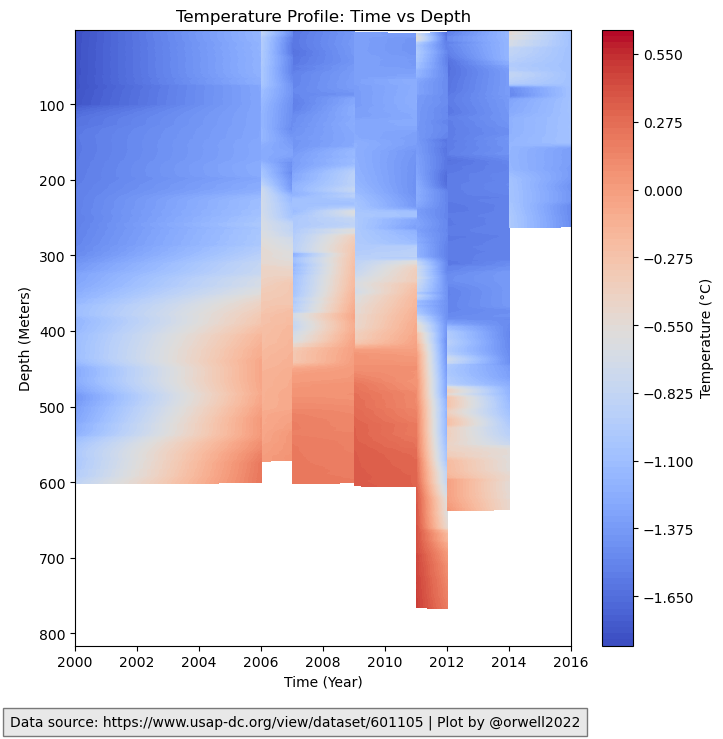

In [20]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Specify the file path
file_path = 'C:\\Users\\Administrator\\Downloads\\DotsonCTDsLADCP_2000_2016.nc'

# Load the NetCDF file
dataset = nc.Dataset(file_path, mode='r')

# Extract the variables
pressure = dataset.variables['P'][:]
temperature = dataset.variables['T'][:]
time = dataset.variables['Time'][:]

# Convert pressure to depth in meters
depth = pressure * 1.02

# Filter data to include only depths corresponding to pressures >= 800 dbar
depth_filter = depth <= (800 * 1.02)
filtered_depth = depth[depth_filter]
filtered_temperature = temperature[depth_filter, :]

# Create a meshgrid for plotting
time_grid, depth_grid = np.meshgrid(time, filtered_depth)

# Plotting the 2D density plot
plt.figure(figsize=(8, 8))
plt.contourf(time_grid, depth_grid, filtered_temperature, levels=100, cmap='coolwarm')
plt.colorbar(label='Temperature (°C)')
plt.title('Temperature Profile: Time vs Depth')
plt.xlabel('Time (Year)')
plt.ylabel('Depth (Meters)')
plt.gca().invert_yaxis()  # Invert the y-axis so depth increases downward

# Add footer with data source and username
plt.figtext(0.4, 0.01, "Data source: https://www.usap-dc.org/view/dataset/601105 | Plot by @orwell2022", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

# Show the plot
plt.show()

# Close the dataset
dataset.close()
